# Maps

In [1]:
import obspy
from obspy import UTCDateTime
import matplotlib.pyplot as plt
from vdapseisutils.sandbox.maps.maps import Map, CrossSection, TimeSeries, VolcanoFigure
%matplotlib inline

radial_extent = 10  # kilometers
maxdepth = 20  # kilometers

hood = dict()
hood["coords"] = [45.374, -121.695, 3426]
hood["name"] = "Hood/Wy'East"
cat_hood_msas = obspy.read_events("../data/catalog_hood_msas.xml", format="QUAKEML")


Make plots using VolcanoFigure: Mt Hood


/home/jwellik/miniconda3/envs/seismology312/lib/python3.12/site-packages/shapely/ops.py:276: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  shell = type(geom.exterior)(zip(*func(*zip(*geom.exterior.coords))))
/home/jwellik/miniconda3/envs/seismology312/lib/python3.12/site-packages/shapely/ops.py:276: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  shell = type(geom.exterior)(zip(*func(*zip(*geom.exterior.coords))))


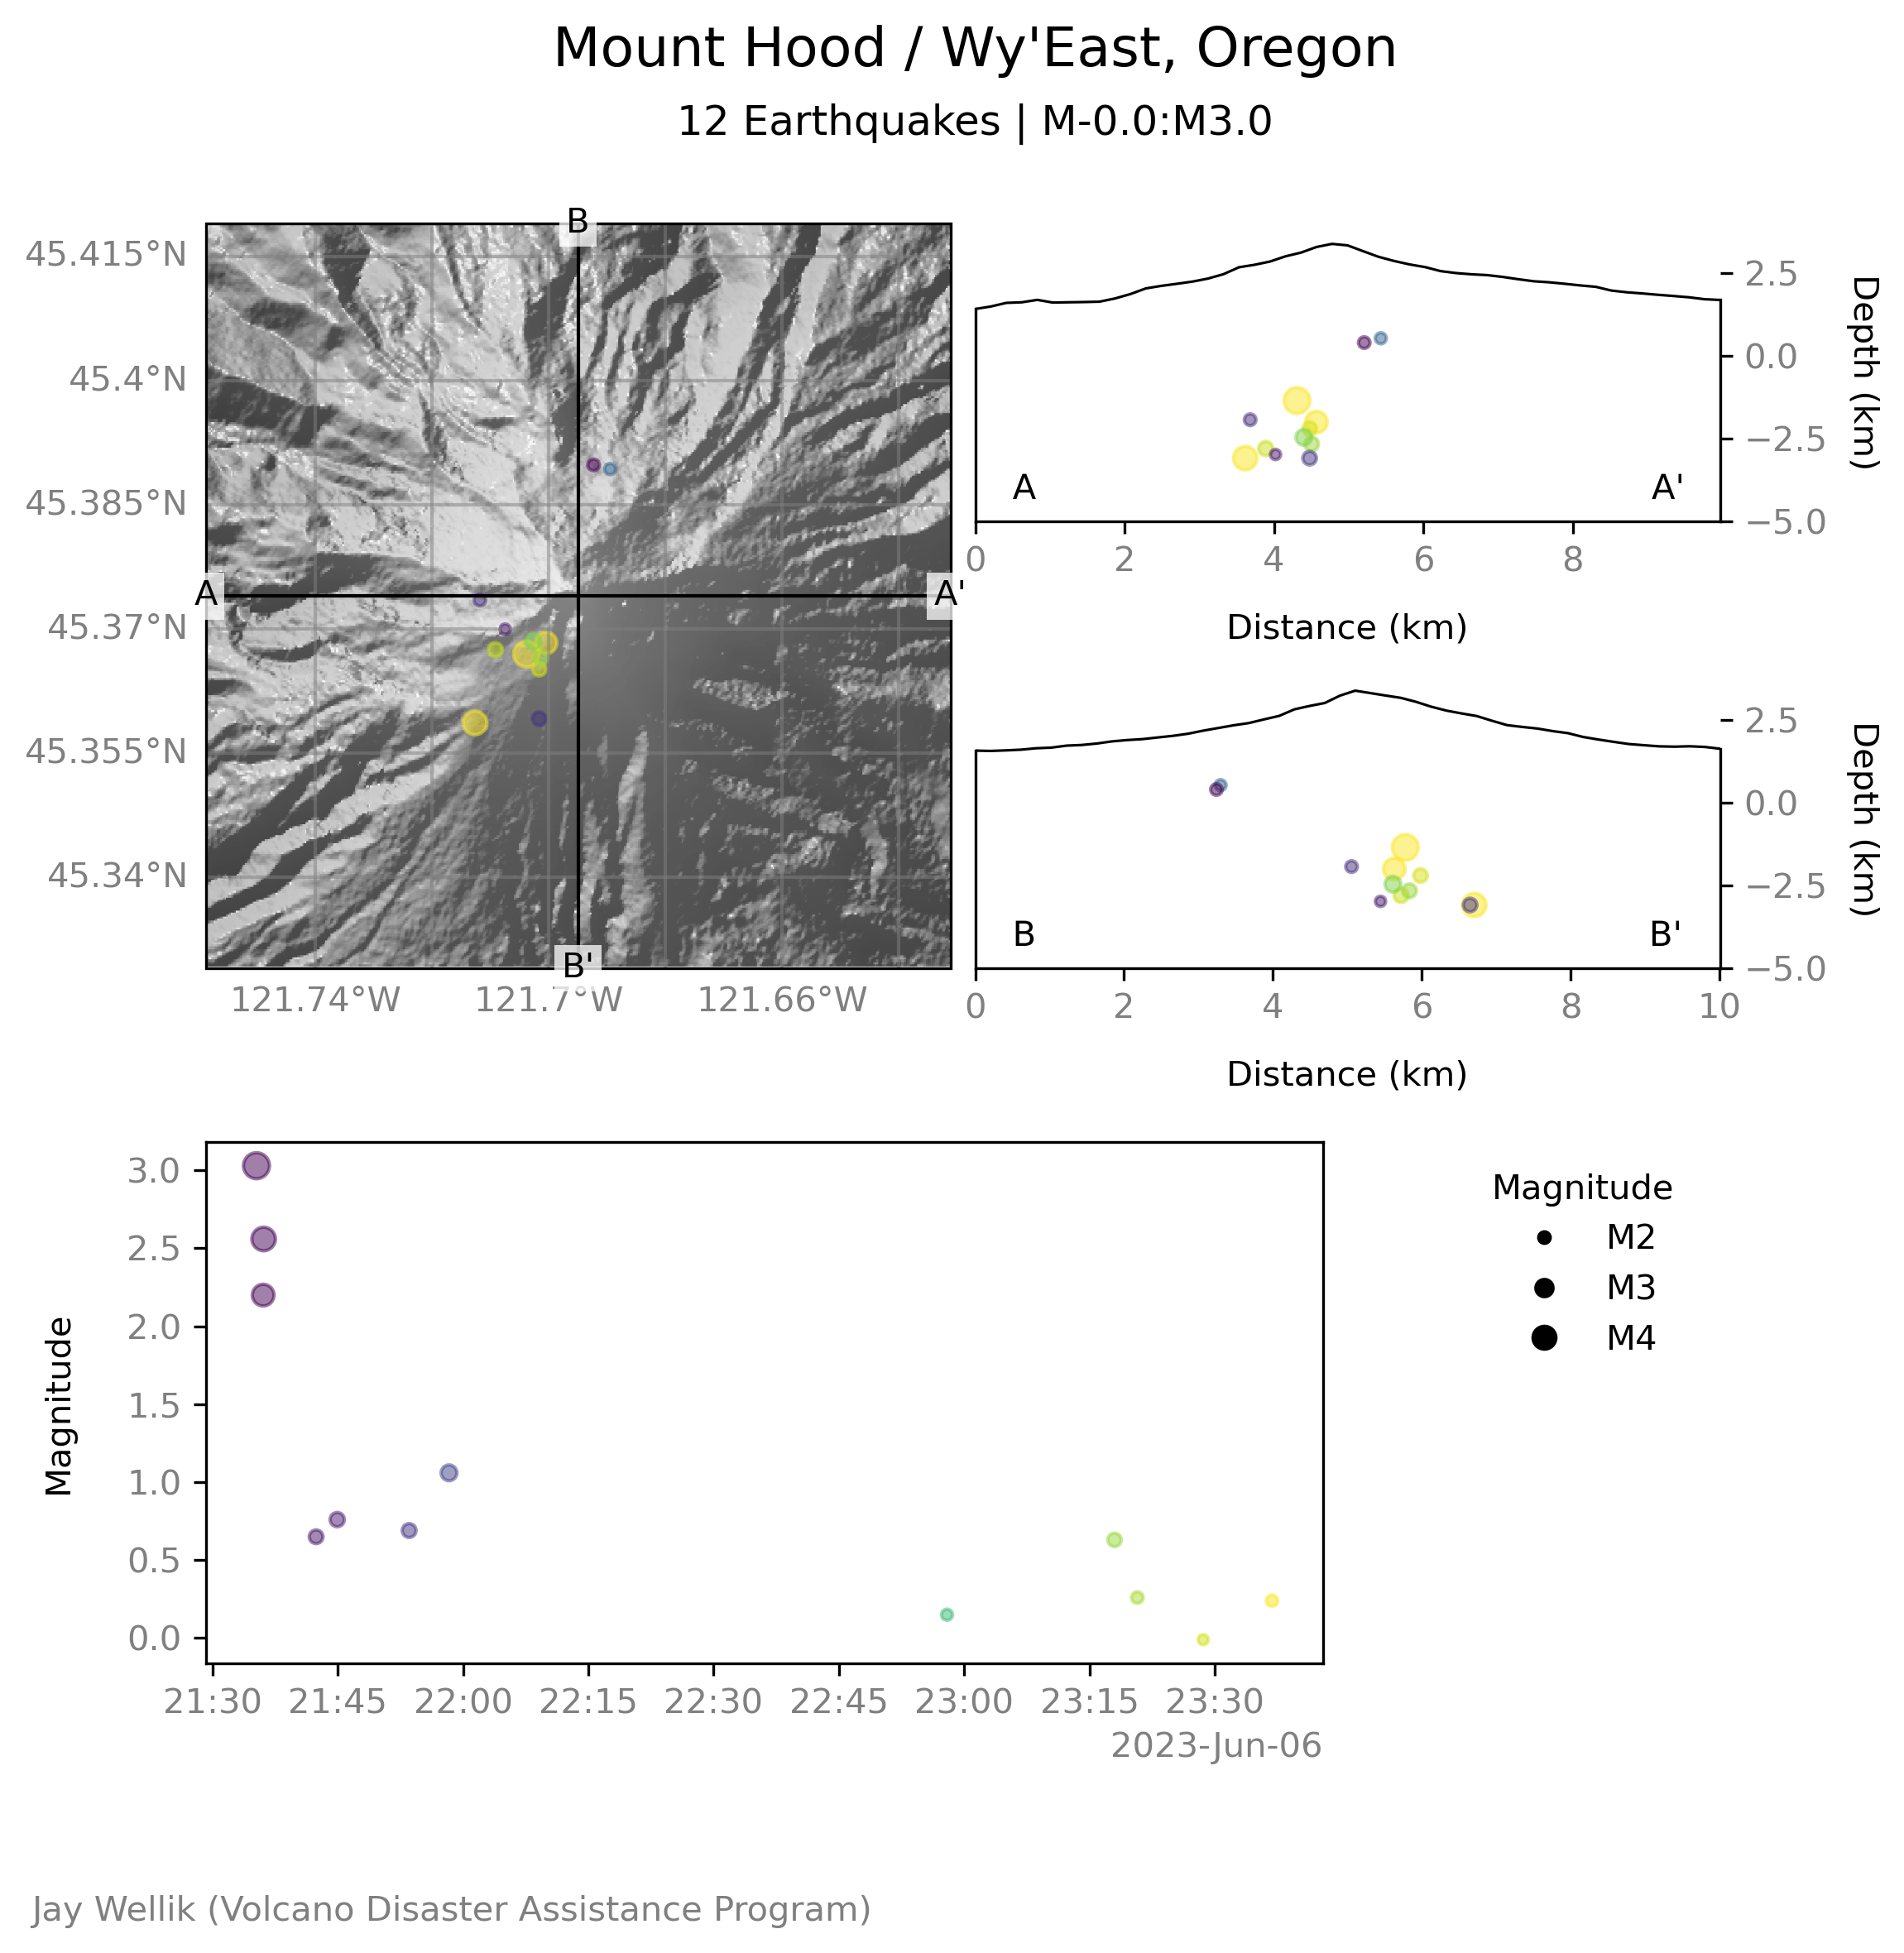

In [2]:
print("Make plots using VolcanoFigure: Mt Hood")

volc = hood
cat = cat_hood_msas

fig2 = plt.figure(figsize=(8, 8), dpi=300)  # width, height
fig2 = VolcanoFigure(fig=fig2, origin=(volc["coords"][0], volc["coords"][1]), depth_extent=(-5, 4), radial_extent_km=5.0, ts_axis_type="magnitude")
fig2.plot_catalog(cat, s="magnitude")
fig2.title("Mount Hood / Wy'East, Oregon")
fig2.catalog_subtitle(cat)
fig2.magnitude_legend(cat)
fig2.reftext("Jay Wellik (Volcano Disaster Assistance Program)")
fig2.savefig("./output/Mapping_tutorial/VolcanoFigure_Hood.png")
plt.show()
